In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2


file_name = 'ridehailing.csv'



In [2]:
df = pd.read_csv(file_name)
df = df.dropna(subset="dropoff_time") # drop car agents

df


,RunId,iteration,Step,num_drivers,size,waiting_time,multi_pass,seed_int,rate,strategy,Manhattan,AgentID,Steps,IdleTime,sec_id,request_time,pickup_time,dropoff_time
0,2,0,0,1,15,NaN,False,11,10,StepType.QUEUE,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0
2,2,0,1,1,15,NaN,False,11,10,StepType.QUEUE,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0
4,2,0,2,1,15,NaN,False,11,10,StepType.QUEUE,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0
6,2,0,3,1,15,NaN,False,11,10,StepType.QUEUE,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0
8,2,0,4,1,15,NaN,False,11,10,StepType.QUEUE,0,1,NaN,NaN,0.0,0.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5879030,749,4,1437,5,15,NaN,False,578,10,StepType.QUEUE,0,290,NaN,NaN,0.0,1430.0,-1.0,-1.0
5879036,749,4,1438,5,15,NaN,False,578,10,StepType.QUEUE,0,290,NaN,NaN,0.0,1430.0,1437.0,-1.0
5879042,749,4,1439,5,15,NaN,False,578,10,StepType.QUEUE,0,290,NaN,NaN,0.0,1430.0,1437.0,-1.0
5879048,749,4,1440,5,15,NaN,False,578,10,StepType.QUEUE,0,290,NaN,NaN,0.0,1430.0,1437.0,-1.0


In [4]:
f_rates = pd.DataFrame()

fulfilled = df[df["dropoff_time"] != -1] # passengers whose requests were fulfilled
unique_fulfilled = fulfilled.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')

unique_df = df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID'], keep='last')


for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):

        num_fulfilled = len(unique_fulfilled[(unique_fulfilled["strategy"] == strategy) & (unique_fulfilled["num_drivers"] == i)])

        total = len(unique_df[(unique_df["strategy"] == strategy) & (unique_df["num_drivers"] == i)])

        f_rate = (num_fulfilled/total) * 100

        f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate}, ignore_index=True)


f_rates

C:\Users\lokhe\AppData\Local\Temp\ipykernel_22728\1191525110.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_22728\1191525110.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_22728\1191525110.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_22728\1191525110.py:18: FutureWarni

,Strategy,num_drivers,f_rate
0,StepType.CLOSEST,1,48.317241
1,StepType.CLOSEST,2,81.671233
2,StepType.CLOSEST,3,91.482993
3,StepType.CLOSEST,4,91.310811
4,StepType.CLOSEST,5,91.919463
5,StepType.QUEUE,1,46.082759
6,StepType.QUEUE,2,80.986301
7,StepType.QUEUE,3,91.142857
8,StepType.QUEUE,4,91.486486
9,StepType.QUEUE,5,91.691275


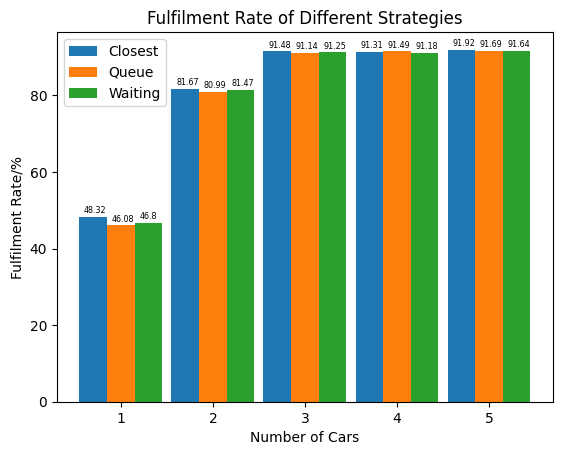

In [26]:
f_rates

labels = [i for i in range (1,6)]
f_rates_list = f_rates['f_rate'].tolist()
closest = f_rates_list[:5]
queue = f_rates_list[5:10]
waiting = f_rates_list[10:]

# Define the bar width
bar_width = 0.3

# Create a figure and axis object
fig, ax = plt.subplots()


ax.bar(np.arange(len(labels)), closest, width=bar_width, label='Closest')
ax.bar(np.arange(len(labels)) + bar_width, queue, width=bar_width, label='Queue')
ax.bar(np.arange(len(labels)) + 2 * bar_width, waiting, width=bar_width, label='Waiting')


# Set the x-axis labels and tick marks
ax.set_xticks(np.arange(len(labels)) + bar_width)
ax.set_xticklabels(labels)

# Add a legend
ax.legend()

plt.xlabel('Number of Cars')
plt.ylabel('Fulfilment Rate/%')
plt.title('Fulfilment Rate of Different Strategies')


for i in range(len(closest)):
    ax.text(i - 0.1, closest[i] + 1, str(round(closest[i], 2)), fontsize='xx-small')
    ax.text(i + bar_width - 0.1, queue[i] + 1, str(round(queue[i], 2)), fontsize='xx-small')
    ax.text(i + 2 * bar_width - 0.1, waiting[i] + 1, str(round(waiting[i], 2)), fontsize='xx-small')


# Display the plot
plt.savefig('figures/f_rate.png')

